# Create a spectorgram from a nanopore read

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/Users/andrewdavidson/workSpace/pythonEnv/DeepBio/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import os
import shutil
#import urllib.request

read1_fast5 = "data/read1.fast5"
read1_fast5_url = "https://github.com/haotianteng/Chiron/blob/master/chiron/example_data/read1.fast5"

if not os.path.exists(read1_fast5):
    directory = os.path.dirname(read1_fast5 )
    if not os.path.exists(directory):
        os.makedirs(directory)
    # TODO AEDWIP bug downloading HDF5 could not open using HDView, 
    #urllib.request.urlretrieve(read1_fast5_url, read1_fast5)
    # ! curl -O $read1_fast5_url -o $read1_fast5
    ! echo "ERROR unable to download"

In [3]:
with h5py.File(read1_fast5, 'r') as fast5_data :
    # Get samping rate
    fast5_info = fast5_data['UniqueGlobalKey/channel_id'].attrs
    sampling_rate = fast5_info['sampling_rate'].astype('int_')     
#     raw_dat = fast5_data['/Raw/Reads/'].values()[0]
    raw_data_set = fast5_data['/Raw/Reads/Read_104/Signal'] # .values()[0]
    #raw_data = raw_dat['Signal'].values()
    raw_data = raw_data_set[:]


n = len(raw_data)
print("sampling_rate:", sampling_rate)
print("n:", n)

sampling_rate: 4000
n: 62461


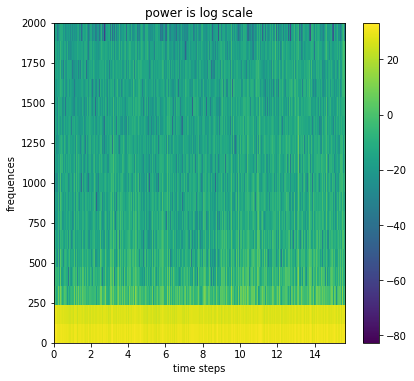

In [6]:
# pxx is the segments x freqs array of instantaneous power,
# freqs is the frequency vector,
# bins are the centers of the time bins in which the power is 
#      computed,
# im is the matplotlib.image.AxesImage instance

fig = plt.figure(figsize=(6,10))
grid = 211 # nrow, ncol, place in grid
plt.subplot(grid) 
    
nfft = 32
noverlap = int( nfft / 2 )
pxx, freqs, bins, im = plt.specgram(raw_data, NFFT=nfft, Fs=sampling_rate, 
                                    noverlap=noverlap, 
#                                         scale='linear'
                                   )

plt.xlabel("time steps")
plt.ylabel("frequences")
plt.title("power is log scale")
fig.colorbar(im)

plt.tight_layout() # adjust so that labels do not over lap

plt.show()